# 1. Getting Started- Loading the data and python packages

## 1.1. Loading the python packages

In [1]:
import tensorflow as tf
import os
# Avoid OOM errors by setting GPU memory consumption growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [2]:
print(tf.test.is_built_with_cuda())
tf.config.list_physical_devices('GPU')

True


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
# tensorflow version
print(tf.__version__)

2.15.0


In [4]:
# data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
import statsmodels.api as sm # For statistical modeling

# Preprocessing and Model Evaluation
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV # For splitting data and evaluating models
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score # For evaluating model performance

# feature selection and feature engineering
# from sklearn.feature_selection import SelectKBest, chi2, RFE
# from sklearn.decomposition import PCA
# from sklearn.pipeline import FeatureUnion, Pipeline

## 1.2. Loading the Data

In [5]:
path= '/content/CryptoA-Fiat-CryptoB.csv'
df = pd.read_csv(path)

# 2. Exploratory Data Analysis

## 2.1. Data Overview

In [6]:
df.shape

(1613, 14)

In [7]:
# print the columns
print(df.columns)

Index(['obs', 'low        (fiat)', 'high      (fiat)', 'open      (fiat)',
       'close     (fiat)', 'vol      (fiat)', 'trade_vol  (fiat)',
       'low (crypto)', 'high (crypto)', 'open (crypto)', 'close (crypto)',
       'vol (crypto)', 'trade_vol (crypto)', 'Unnamed: 13'],
      dtype='object')


In [8]:
df.head()

,obs,low (fiat),high (fiat),open (fiat),close (fiat),vol (fiat),trade_vol (fiat),low (crypto),high (crypto),open (crypto),close (crypto),vol (crypto),trade_vol (crypto),Unnamed: 13
0,1,69.103,72.883,71.188,70.718,3671.094246,259612.4429,0.00835457,0.008648,0.008566,0.008450,635.047788,5.366243,NaN
1,2,69.012,70.998,70.691,70.969,1455.866969,103321.4229,0.00838294,0.008520,0.008447,0.008459,348.847022,2.950890,NaN
2,3,68.006,71.232,71.109,69.297,2087.604971,144664.7617,0.00836785,0.008548,0.008444,0.008439,458.127542,3.866299,NaN
3,4,68.002,70.573,69.328,69.864,1770.263955,123677.7209,0.00841485,0.008565,0.008452,0.008562,239.334295,2.049152,NaN
4,5,68.341,70.350,69.846,70.214,1541.626939,108243.7939,0.00850048,0.008616,0.008550,0.008575,209.179333,1.793736,NaN


In [9]:
df.describe()

,obs,low (fiat),high (fiat),open (fiat),close (fiat),vol (fiat),trade_vol (fiat),high (crypto),open (crypto),close (crypto),vol (crypto),trade_vol (crypto),Unnamed: 13
count,1613.000000,1613.000000,1613.000000,1613.00000,1613.000000,1613.000000,1.613000e+03,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,0.0
mean,807.000000,87.240236,95.793562,91.67922,91.649638,17086.854757,2.354129e+06,0.004198,0.004067,0.004062,1856.239966,10.294752,NaN
std,465.777307,63.370424,72.624219,68.13095,68.139586,27507.537663,6.495254e+06,0.003018,0.002904,0.002903,3800.731844,25.239394,NaN
min,1.000000,23.100000,25.070000,24.72000,24.740000,773.868989,2.328397e+04,0.000549,0.000516,0.000511,0.391000,0.000383,NaN
25%,404.000000,42.200000,44.770000,43.41000,43.470000,5334.475262,2.436646e+05,0.002125,0.002080,0.002077,329.585887,0.809398,NaN
50%,807.000000,68.085000,72.315000,70.19700,70.170000,9911.558050,6.523170e+05,0.003110,0.003010,0.003018,801.223383,2.791940,NaN
75%,1210.000000,109.406000,118.770000,115.00000,114.990000,18093.849950,2.042025e+06,0.006045,0.005768,0.005765,1904.254841,10.283561,NaN
max,1613.000000,393.001000,478.598000,443.05600,443.754000,569776.810200,1.525595e+08,0.016461,0.015089,0.015056,59935.619200,520.696005,NaN


## 2.2 Data Quality Assessment

In [10]:
# Observe the column datatype and check for mismatch datatype
# you will see some of the variables have wrong datatype assigned
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1613 entries, 0 to 1612
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   obs                 1613 non-null   int64  
 1   low        (fiat)   1613 non-null   float64
 2   high      (fiat)    1613 non-null   float64
 3   open      (fiat)    1613 non-null   float64
 4   close     (fiat)    1613 non-null   float64
 5   vol      (fiat)     1613 non-null   float64
 6   trade_vol  (fiat)   1613 non-null   float64
 7   low (crypto)        1613 non-null   object 
 8   high (crypto)       1613 non-null   float64
 9   open (crypto)       1613 non-null   float64
 10  close (crypto)      1613 non-null   float64
 11  vol (crypto)        1613 non-null   float64
 12  trade_vol (crypto)  1613 non-null   float64
 13  Unnamed: 13         0 non-null      float64
dtypes: float64(12), int64(1), object(1)
memory usage: 176.5+ KB


In [11]:
df.isnull().sum()

obs                      0
low        (fiat)        0
high      (fiat)         0
open      (fiat)         0
close     (fiat)         0
vol      (fiat)          0
trade_vol  (fiat)        0
low (crypto)             0
high (crypto)            0
open (crypto)            0
close (crypto)           0
vol (crypto)             0
trade_vol (crypto)       0
Unnamed: 13           1613
dtype: int64

array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

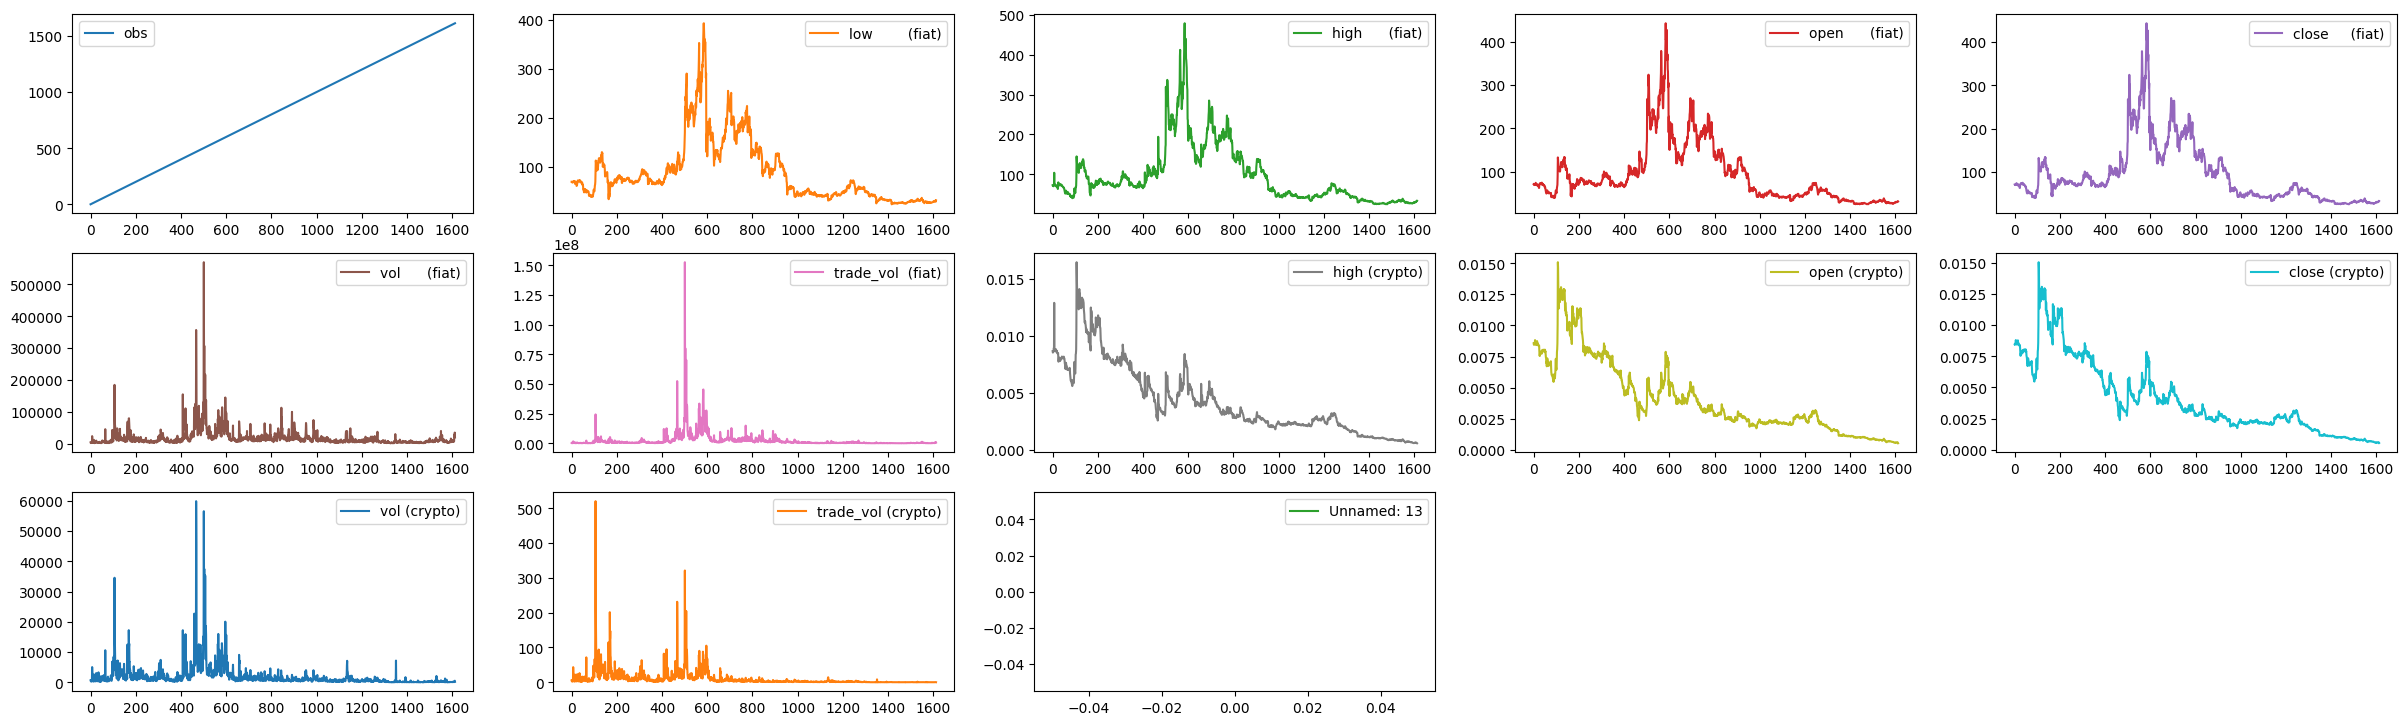

In [12]:
# plot a series of line graphs to see the trend of the of the data with respect to obs
df.plot(subplots=True, layout=(5,5), sharex=False, sharey=False, figsize=(30,15))

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

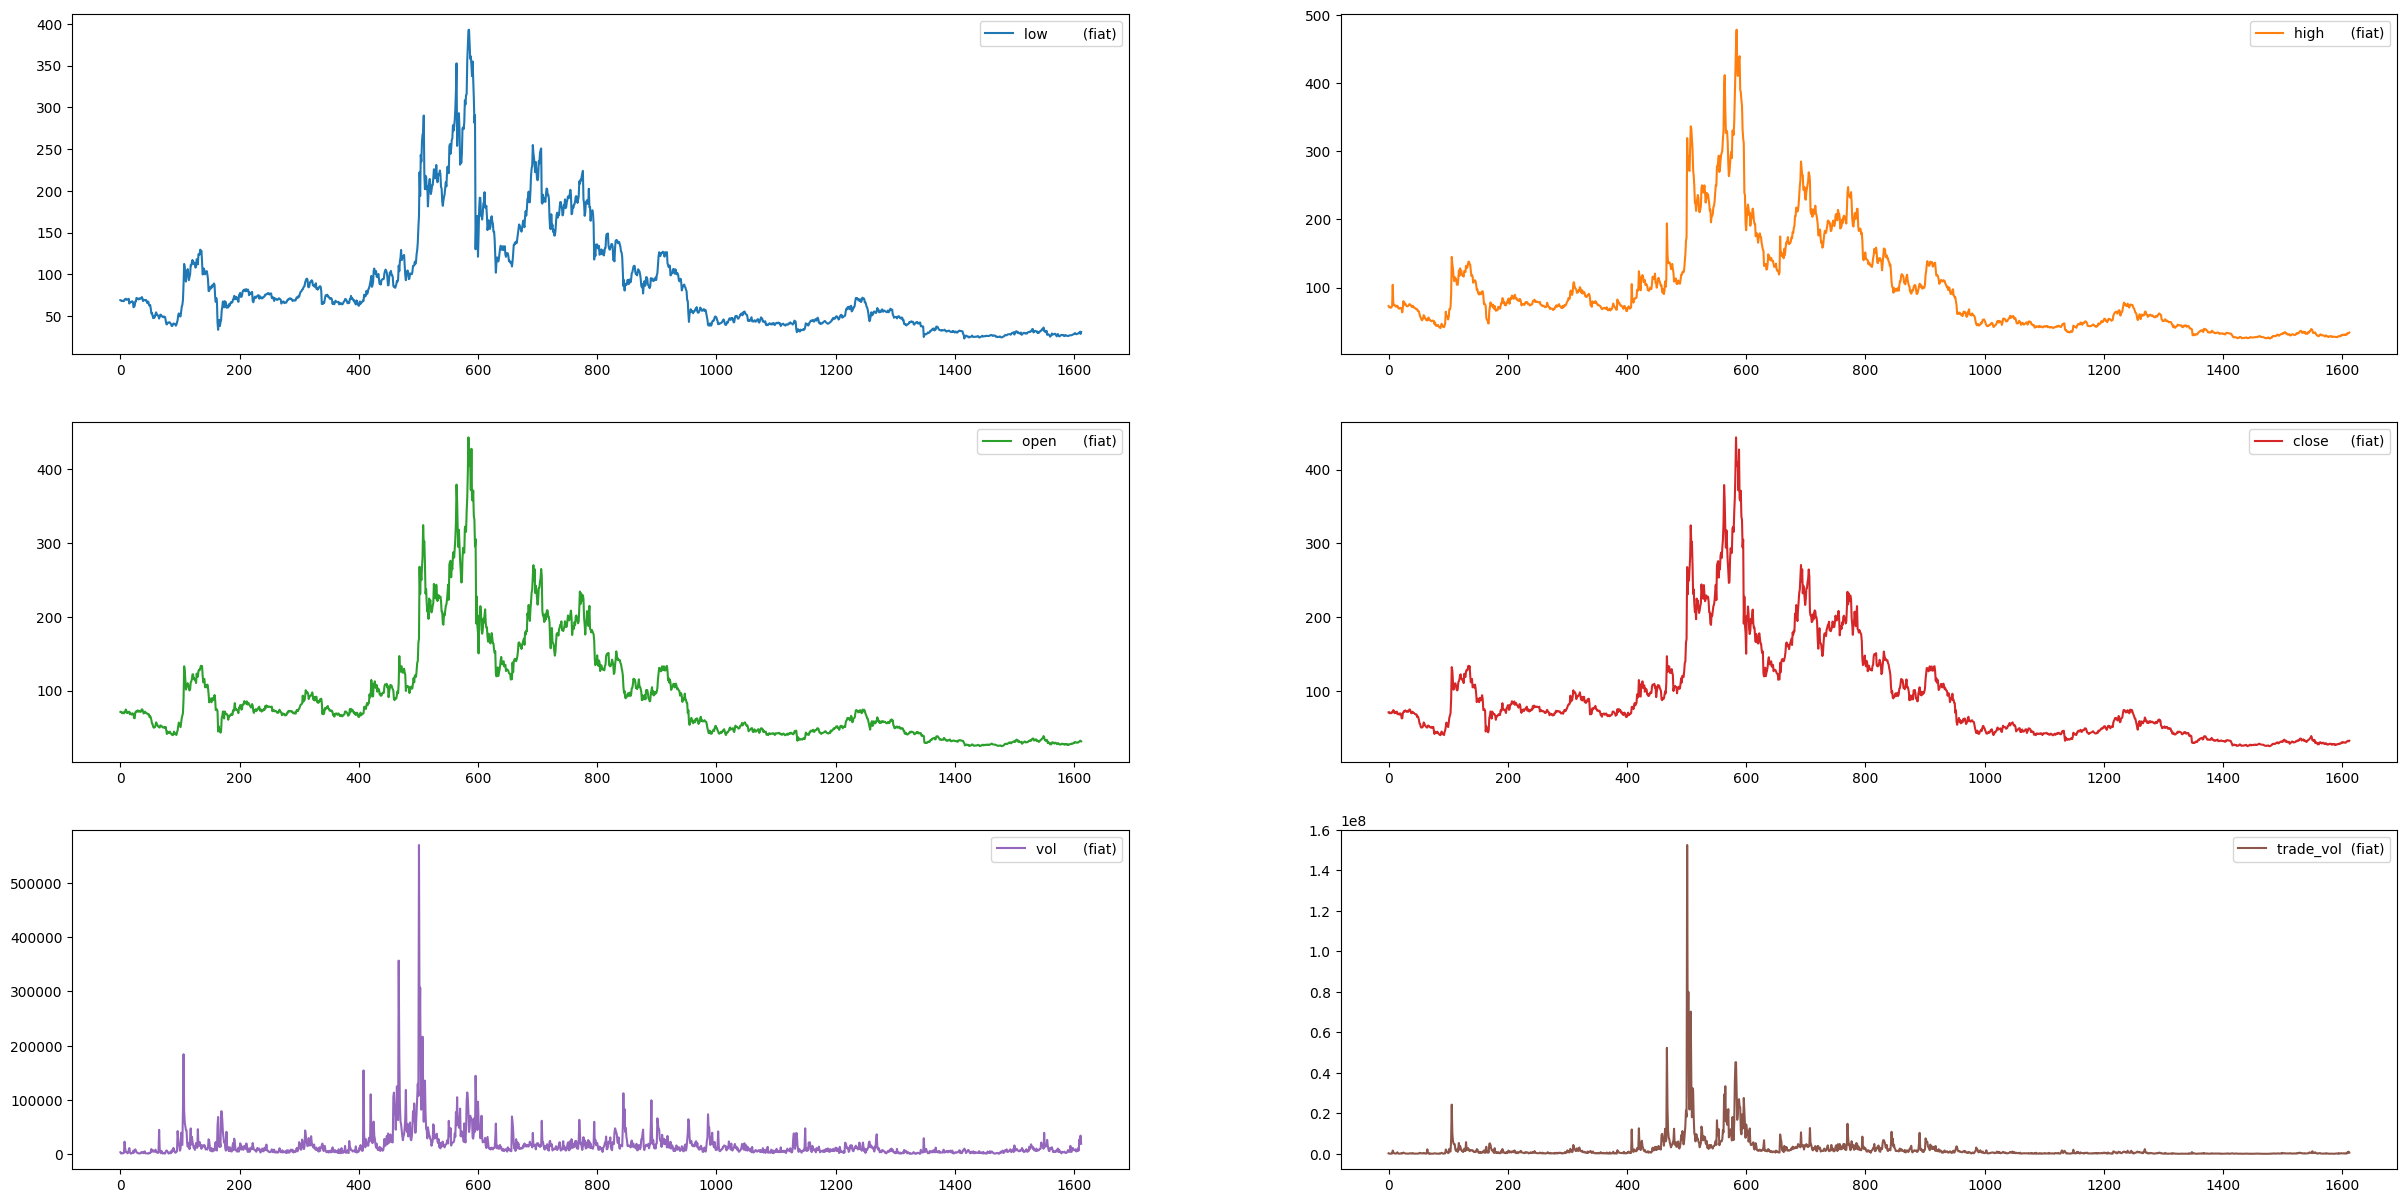

In [13]:
# plot a line graph to see the trend of the low (fiat), high (fiat), open (fiat), close (fiat), volume (fiat), trade_vol (fiat) with respect to obs
df.plot(y=['low        (fiat)', 'high      (fiat)', 'open      (fiat)', 'close     (fiat)', 'vol      (fiat)', 'trade_vol  (fiat)'], subplots=True, layout=(3,2), sharex=False, sharey=False, figsize=(30,15))

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

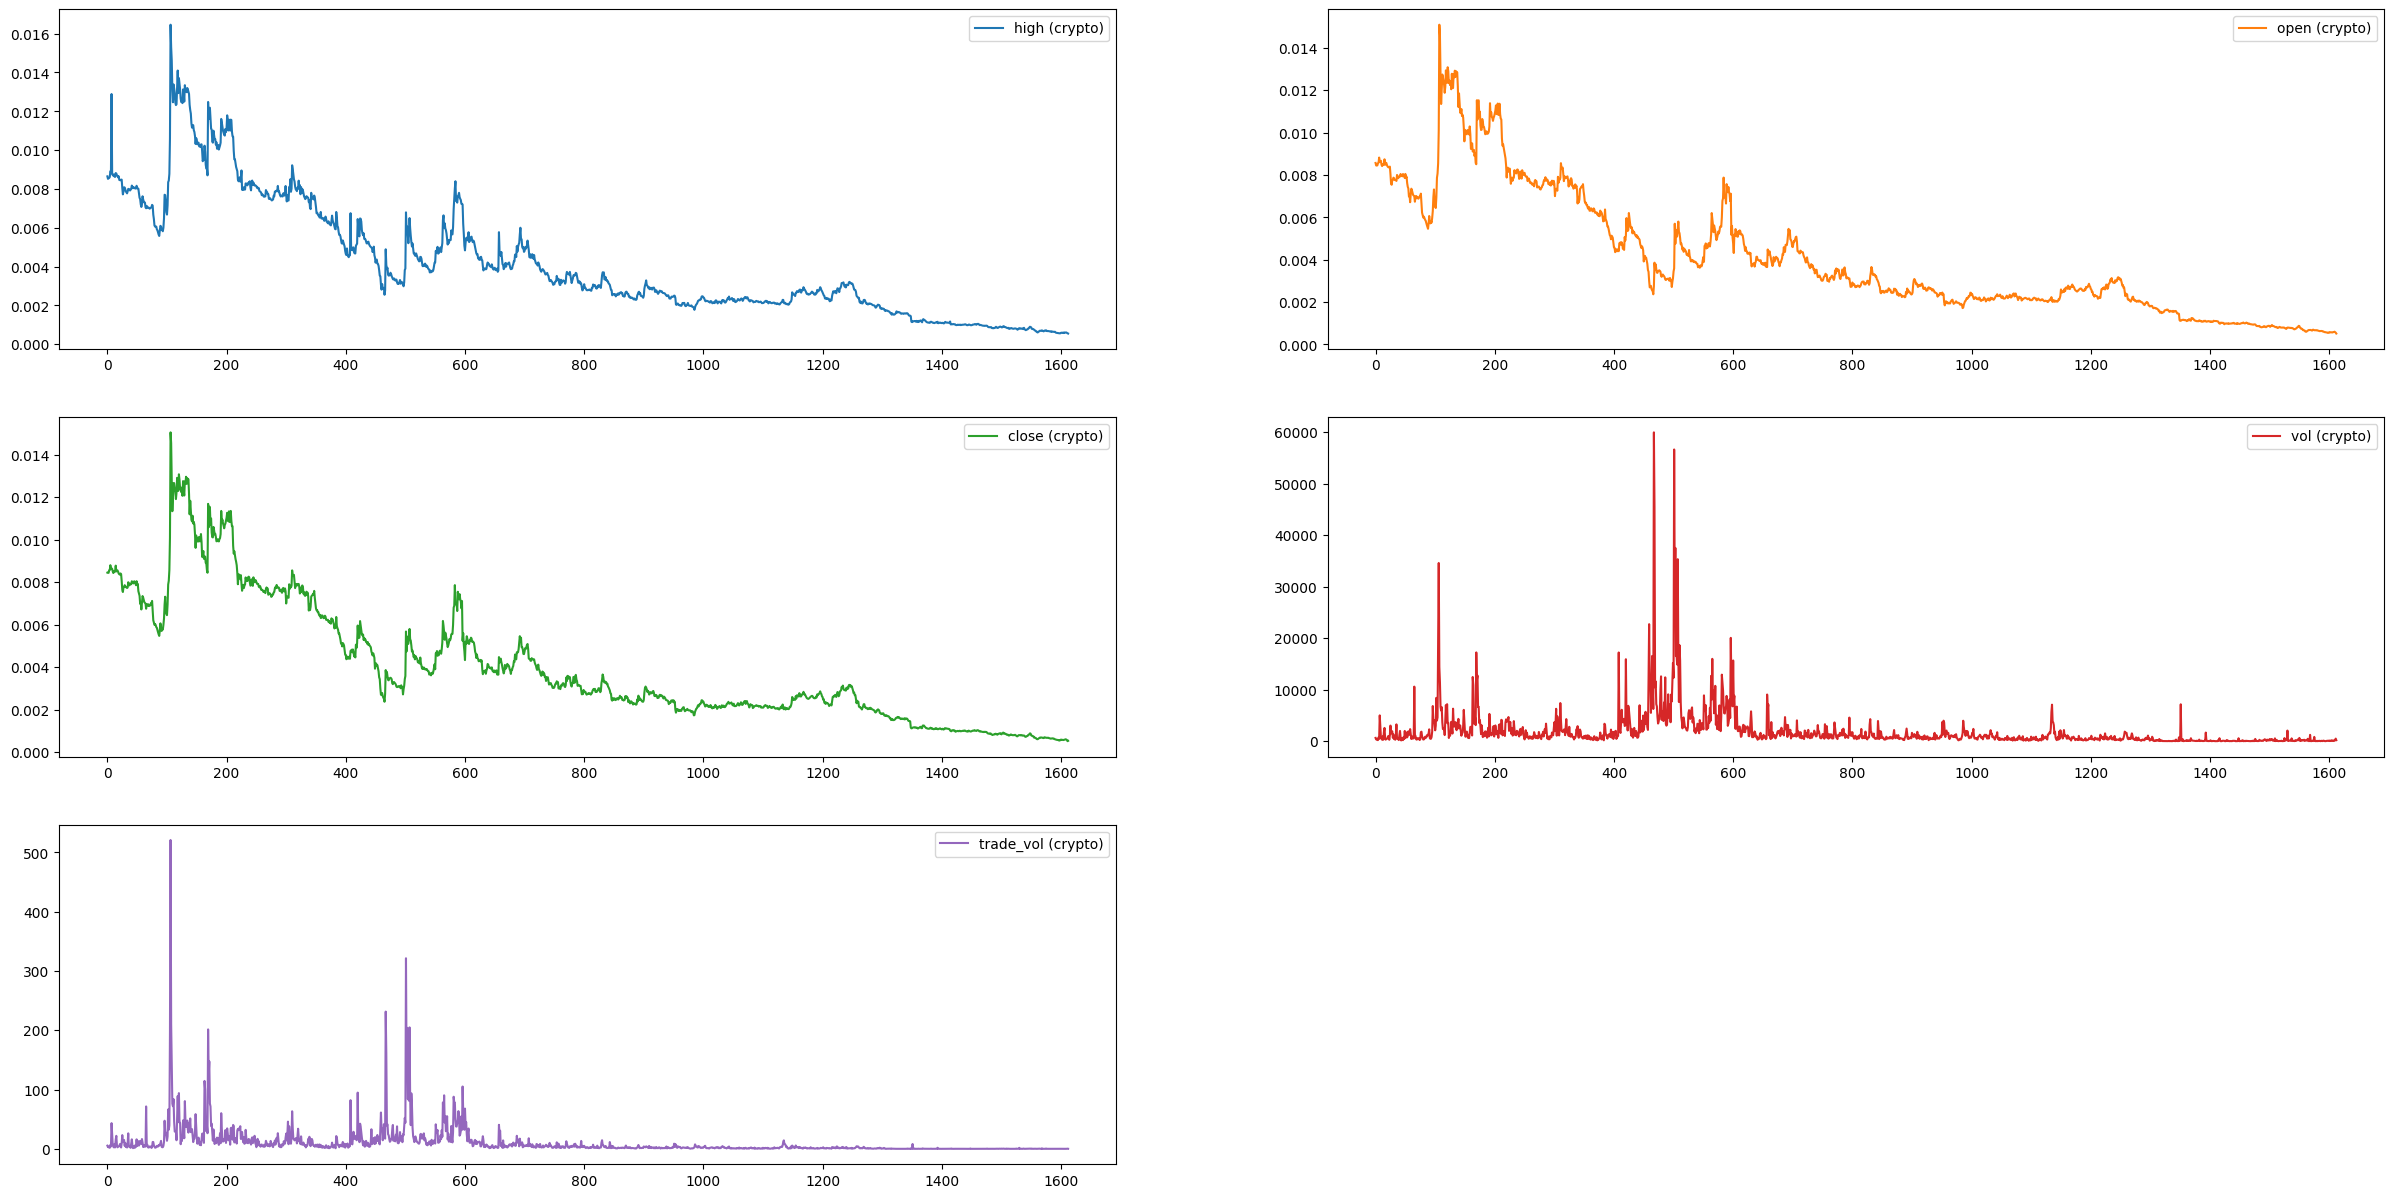

In [14]:
# plot a line graph to see the trend of the low (crypto), high (crypto), open (crypto), close (crypto), volume (crypto), trade_vol (crypto) with respect to obs
df.plot(y=['low (crypto)', 'high (crypto)', 'open (crypto)', 'close (crypto)', 'vol (crypto)', 'trade_vol (crypto)'], subplots=True, layout=(3,2), sharex=False, sharey=False, figsize=(30,15))

# 3. Data Cleaning
Clean and pre-process the provided data to remove any inconsistencies or missing values

## 3.1. Handle missing values:
Identify and address missing values using appropriate techniques (e.g., imputation, deletion).

In [15]:
# Drop the Unnamed: 13 column
df = df.drop(['Unnamed: 13'], axis=1)

In [16]:
# low (crypto) dtype is object but it should be float64
# find the non numeric values in the column
df['low (crypto)'].str.isnumeric().value_counts()

low (crypto)
False    1613
Name: count, dtype: int64

In [17]:
# Identify Non-Numeric Values: Use pd.to_numeric() with errors='coerce' to convert the column to numeric, which will replace non-numeric values with NaN.
# Then, use isna() to find these NaN values.
numeric_column = pd.to_numeric(df['low (crypto)'], errors='coerce')
non_numeric_rows = numeric_column.isna()

In [18]:
# Inspect Non-Numeric Values: To see the rows with non-numeric values, you can use the boolean mask non_numeric_rows to filter the DataFrame.
non_numeric_values = df[non_numeric_rows]
non_numeric_values

,obs,low (fiat),high (fiat),open (fiat),close (fiat),vol (fiat),trade_vol (fiat),low (crypto),high (crypto),open (crypto),close (crypto),vol (crypto),trade_vol (crypto)
717,718,194.727,209.474,208.157,199.387,8579.444125,1710629.626,0.00415518(crypto),0.004362,0.004351,0.004213,786.698145,3.314391


In [19]:
# Replace '0.00415518(crypto)' with 0.00415518
df['low (crypto)'].replace({'0.00415518(crypto)': 0.00415518}, inplace=True)

# Convert the column to float64 to ensure it's of the correct data type
df['low (crypto)'] = df['low (crypto)'].astype('float64')

# Verify the data type of the 'low' column
print(df['low (crypto)'].dtype)

float64


In [20]:
# the fiat column headers have too much space between the text and the brackets
df.rename(columns={'low        (fiat)': 'low (fiat)', 'high      (fiat)': 'high (fiat)', 'open      (fiat)': 'open (fiat)', 'close     (fiat)': 'close (fiat)', 'vol      (fiat)': 'vol (fiat)', 'trade_vol  (fiat)': 'trade_vol (fiat)'}, inplace=True)
print(df.columns)

Index(['obs', 'low (fiat)', 'high (fiat)', 'open (fiat)', 'close (fiat)',
       'vol (fiat)', 'trade_vol (fiat)', 'low (crypto)', 'high (crypto)',
       'open (crypto)', 'close (crypto)', 'vol (crypto)',
       'trade_vol (crypto)'],
      dtype='object')


In [21]:
# obs column should be the cokumn index
df.set_index('obs', inplace=True)
df.head()

,low (fiat),high (fiat),open (fiat),close (fiat),vol (fiat),trade_vol (fiat),low (crypto),high (crypto),open (crypto),close (crypto),vol (crypto),trade_vol (crypto)
obs,,,,,,,,,,,,
1,69.103,72.883,71.188,70.718,3671.094246,259612.4429,0.008355,0.008648,0.008566,0.008450,635.047788,5.366243
2,69.012,70.998,70.691,70.969,1455.866969,103321.4229,0.008383,0.008520,0.008447,0.008459,348.847022,2.950890
3,68.006,71.232,71.109,69.297,2087.604971,144664.7617,0.008368,0.008548,0.008444,0.008439,458.127542,3.866299
4,68.002,70.573,69.328,69.864,1770.263955,123677.7209,0.008415,0.008565,0.008452,0.008562,239.334295,2.049152
5,68.341,70.350,69.846,70.214,1541.626939,108243.7939,0.008500,0.008616,0.008550,0.008575,209.179333,1.793736


# 4. Feature Engineering

In this section, we will create new features based on the existing data that might enhance the predictive power of our model. We will consider features like moving averages, volatility indices, and time-related features.

* **Moving Average**: This technique smooths out data and identifies underlying trends by averaging price values over a specified period. This can help reduce noise and highlight long-term trends.

* **Stochastic Oscillator %K and %D**: The stochastic oscillator is a momentum indicator that compares a security's closing price to its price range over a predetermined period. The %K line represents the number of time periods and the %D line is the moving average of the %K.

* **Relative Strength Index (RSI)**: This is a momentum indicator that measures the speed and change of price movements. It is used to identify overbought or oversold conditions in the price of a stock or other asset.

* **Rate Of Change (ROC)**: The ROC is a momentum oscillator that measures the percentage change between the current price and the price "n" periods ago.

* **Momentum (MOM)**: Momentum is a measure of the rate of acceleration of a security's price or volume. In other words, it represents the speed at which the price is changing.

* **Bollinger Bands**: These bands statistically characterize price volatility over time, providing insights into potential price breakouts or contractions.

* **Moving Average Convergence Divergence (MACD)**: This trend-following momentum indicator shows the relationship between two moving averages of a security's price, potentially signaling trend reversals or continuations.


In [22]:
# range between the high (fiat) and low (fiat)
df['range (fiat)'] = df['high (fiat)'] - df['low (fiat)']

In [23]:
# # Create moving averages of different windows

df['close (fiat)_MA_5'] = df['close (fiat)'].rolling(window=5).mean()
df['close (fiat)_MA_10'] = df['close (fiat)'].rolling(window=10).mean()
df['close (fiat)_MA_20'] = df['close (fiat)'].rolling(window=20).mean()
df['close (fiat)_MA_50'] = df['close (fiat)'].rolling(window=50).mean()
df['close (fiat)_MA_100'] = df['close (fiat)'].rolling(window=100).mean()
df['close (fiat)_MA_200'] = df['close (fiat)'].rolling(window=200).mean()
df['close (fiat)_MA_365'] = df['close (fiat)'].rolling(window=365).mean()
df['close (fiat)_MA_500'] = df['close (fiat)'].rolling(window=500).mean()

In [24]:
#calculation of exponential moving average
def EMA(df, n):
    EMA = pd.Series(df['close (fiat)'].ewm(span=n, min_periods=n).mean(), name='EMA_' + str(n))
    return EMA

# df['close (fiat)_EMA_5'] = EMA(df, 5)
df['close (fiat)_EMA_10'] = EMA(df, 10)
# df['close (fiat)_EMA_20'] = EMA(df, 20)
df['close (fiat)_EMA_50'] = EMA(df, 50)
df['close (fiat)_EMA_100'] = EMA(df, 100)
df['close (fiat)_EMA_200'] = EMA(df, 200)
df['close (fiat)_EMA_365'] = EMA(df, 365)
df['close (fiat)_EMA_500'] = EMA(df, 500)

In [25]:
# Create Stochastic Oscillator %K and %D
def STOK(close, low, high, n):
 STOK = ((close - low.rolling(n).min()) / (high.rolling(n).max() - low.rolling(n).min())) * 100
 return STOK

def STOD(close, low, high, n):
 STOK = ((close - low.rolling(n).min()) / (high.rolling(n).max() - low.rolling(n).min())) * 100
 STOD = STOK.rolling(3).mean()
 return STOD

df['%K10'] = STOK(df['close (fiat)'], df['low (fiat)'], df['high (fiat)'], 10)
df['%D10'] = STOD(df['close (fiat)'], df['low (fiat)'], df['high (fiat)'], 10)
df['%K50'] = STOK(df['close (fiat)'], df['low (fiat)'], df['high (fiat)'], 50)
df['%D50'] = STOD(df['close (fiat)'], df['low (fiat)'], df['high (fiat)'], 50)
df['%K100'] = STOK(df['close (fiat)'], df['low (fiat)'], df['high (fiat)'], 100)
df['%D100'] = STOD(df['close (fiat)'], df['low (fiat)'], df['high (fiat)'], 100)
df['%K200'] = STOK(df['close (fiat)'], df['low (fiat)'], df['high (fiat)'], 200)
df['%K365'] = STOK(df['close (fiat)'], df['low (fiat)'], df['high (fiat)'], 365)
df['%K500'] = STOK(df['close (fiat)'], df['low (fiat)'], df['high (fiat)'], 500)

In [26]:
#calculation of relative strength index
def RSI(series, period):
 delta = series.diff().dropna()
 u = delta * 0
 d = u.copy()
 u[delta > 0] = delta[delta > 0]
 d[delta < 0] = -delta[delta < 0]
 u[u.index[period-1]] = np.mean( u[:period] ) #first value is sum of avg gains
 u = u.drop(u.index[:(period-1)])
 d[d.index[period-1]] = np.mean( d[:period] ) #first value is sum of avg losses
 d = d.drop(d.index[:(period-1)])
 rs = u.ewm(com=period-1, adjust=False).mean() / \
 d.ewm(com=period-1, adjust=False).mean()
 return 100 - 100 / (1 + rs)

df['RSI10'] = RSI(df['close (fiat)'], 10)
df['RSI50'] = RSI(df['close (fiat)'], 50)
df['RSI100'] = RSI(df['close (fiat)'], 100)
df['RSI200'] = RSI(df['close (fiat)'], 200)
df['RSI365'] = RSI(df['close (fiat)'], 365)
df['RSI500'] = RSI(df['close (fiat)'], 500)

In [27]:
#calculation of rate of change
def ROC(df, n):
    M = df.diff(n - 1)
    N = df.shift(n - 1)
    ROC = pd.Series(((M / N) * 100), name = 'ROC_' + str(n))
    return ROC

df['ROC10'] = ROC(df['close (fiat)'], 10)
df['ROC50'] = ROC(df['close (fiat)'], 50)
df['ROC100'] = ROC(df['close (fiat)'], 100)
df['ROC200'] = ROC(df['close (fiat)'], 200)
df['ROC365'] = ROC(df['close (fiat)'], 365)
df['ROC500'] = ROC(df['close (fiat)'], 500)

In [28]:
df.tail()

,low (fiat),high (fiat),open (fiat),close (fiat),vol (fiat),trade_vol (fiat),low (crypto),high (crypto),open (crypto),close (crypto),...,RSI100,RSI200,RSI365,RSI500,ROC10,ROC50,ROC100,ROC200,ROC365,ROC500
obs,,,,,,,,,,,,,,,,,,,,,
1609,29.72,31.01,30.45,30.94,6987.398035,2.161901e+05,0.000577,0.000602,0.000585,0.000602,...,49.890488,48.277652,48.357393,48.700399,6.469374,13.917526,3.409091,-4.240173,-58.217421,-23.111332
1610,29.95,33.09,30.94,31.81,27156.757600,8.638565e+05,0.000576,0.000604,0.000604,0.000582,...,50.462247,48.482560,48.422082,48.737554,5.122274,12.085976,4.158481,-2.002465,-57.146706,-21.437392
1611,31.30,32.93,31.91,32.09,20377.463480,6.539128e+05,0.000560,0.000583,0.000582,0.000565,...,50.645320,48.548492,48.442924,48.749525,7.756884,17.416758,4.493650,-0.403476,-55.219090,-23.119310
1612,28.61,33.03,32.09,31.25,34304.551080,1.072017e+06,0.000477,0.000561,0.000558,0.000511,...,50.084431,48.361879,48.384109,48.715329,3.579715,6.076035,11.647017,-2.098997,-57.804483,-24.825595
1613,30.91,33.84,31.25,32.09,19257.872990,6.179851e+05,0.000516,0.000549,0.000516,0.000528,...,50.636645,48.560598,48.446872,48.751350,7.648440,6.646726,9.934909,0.627156,-55.584775,-21.251534


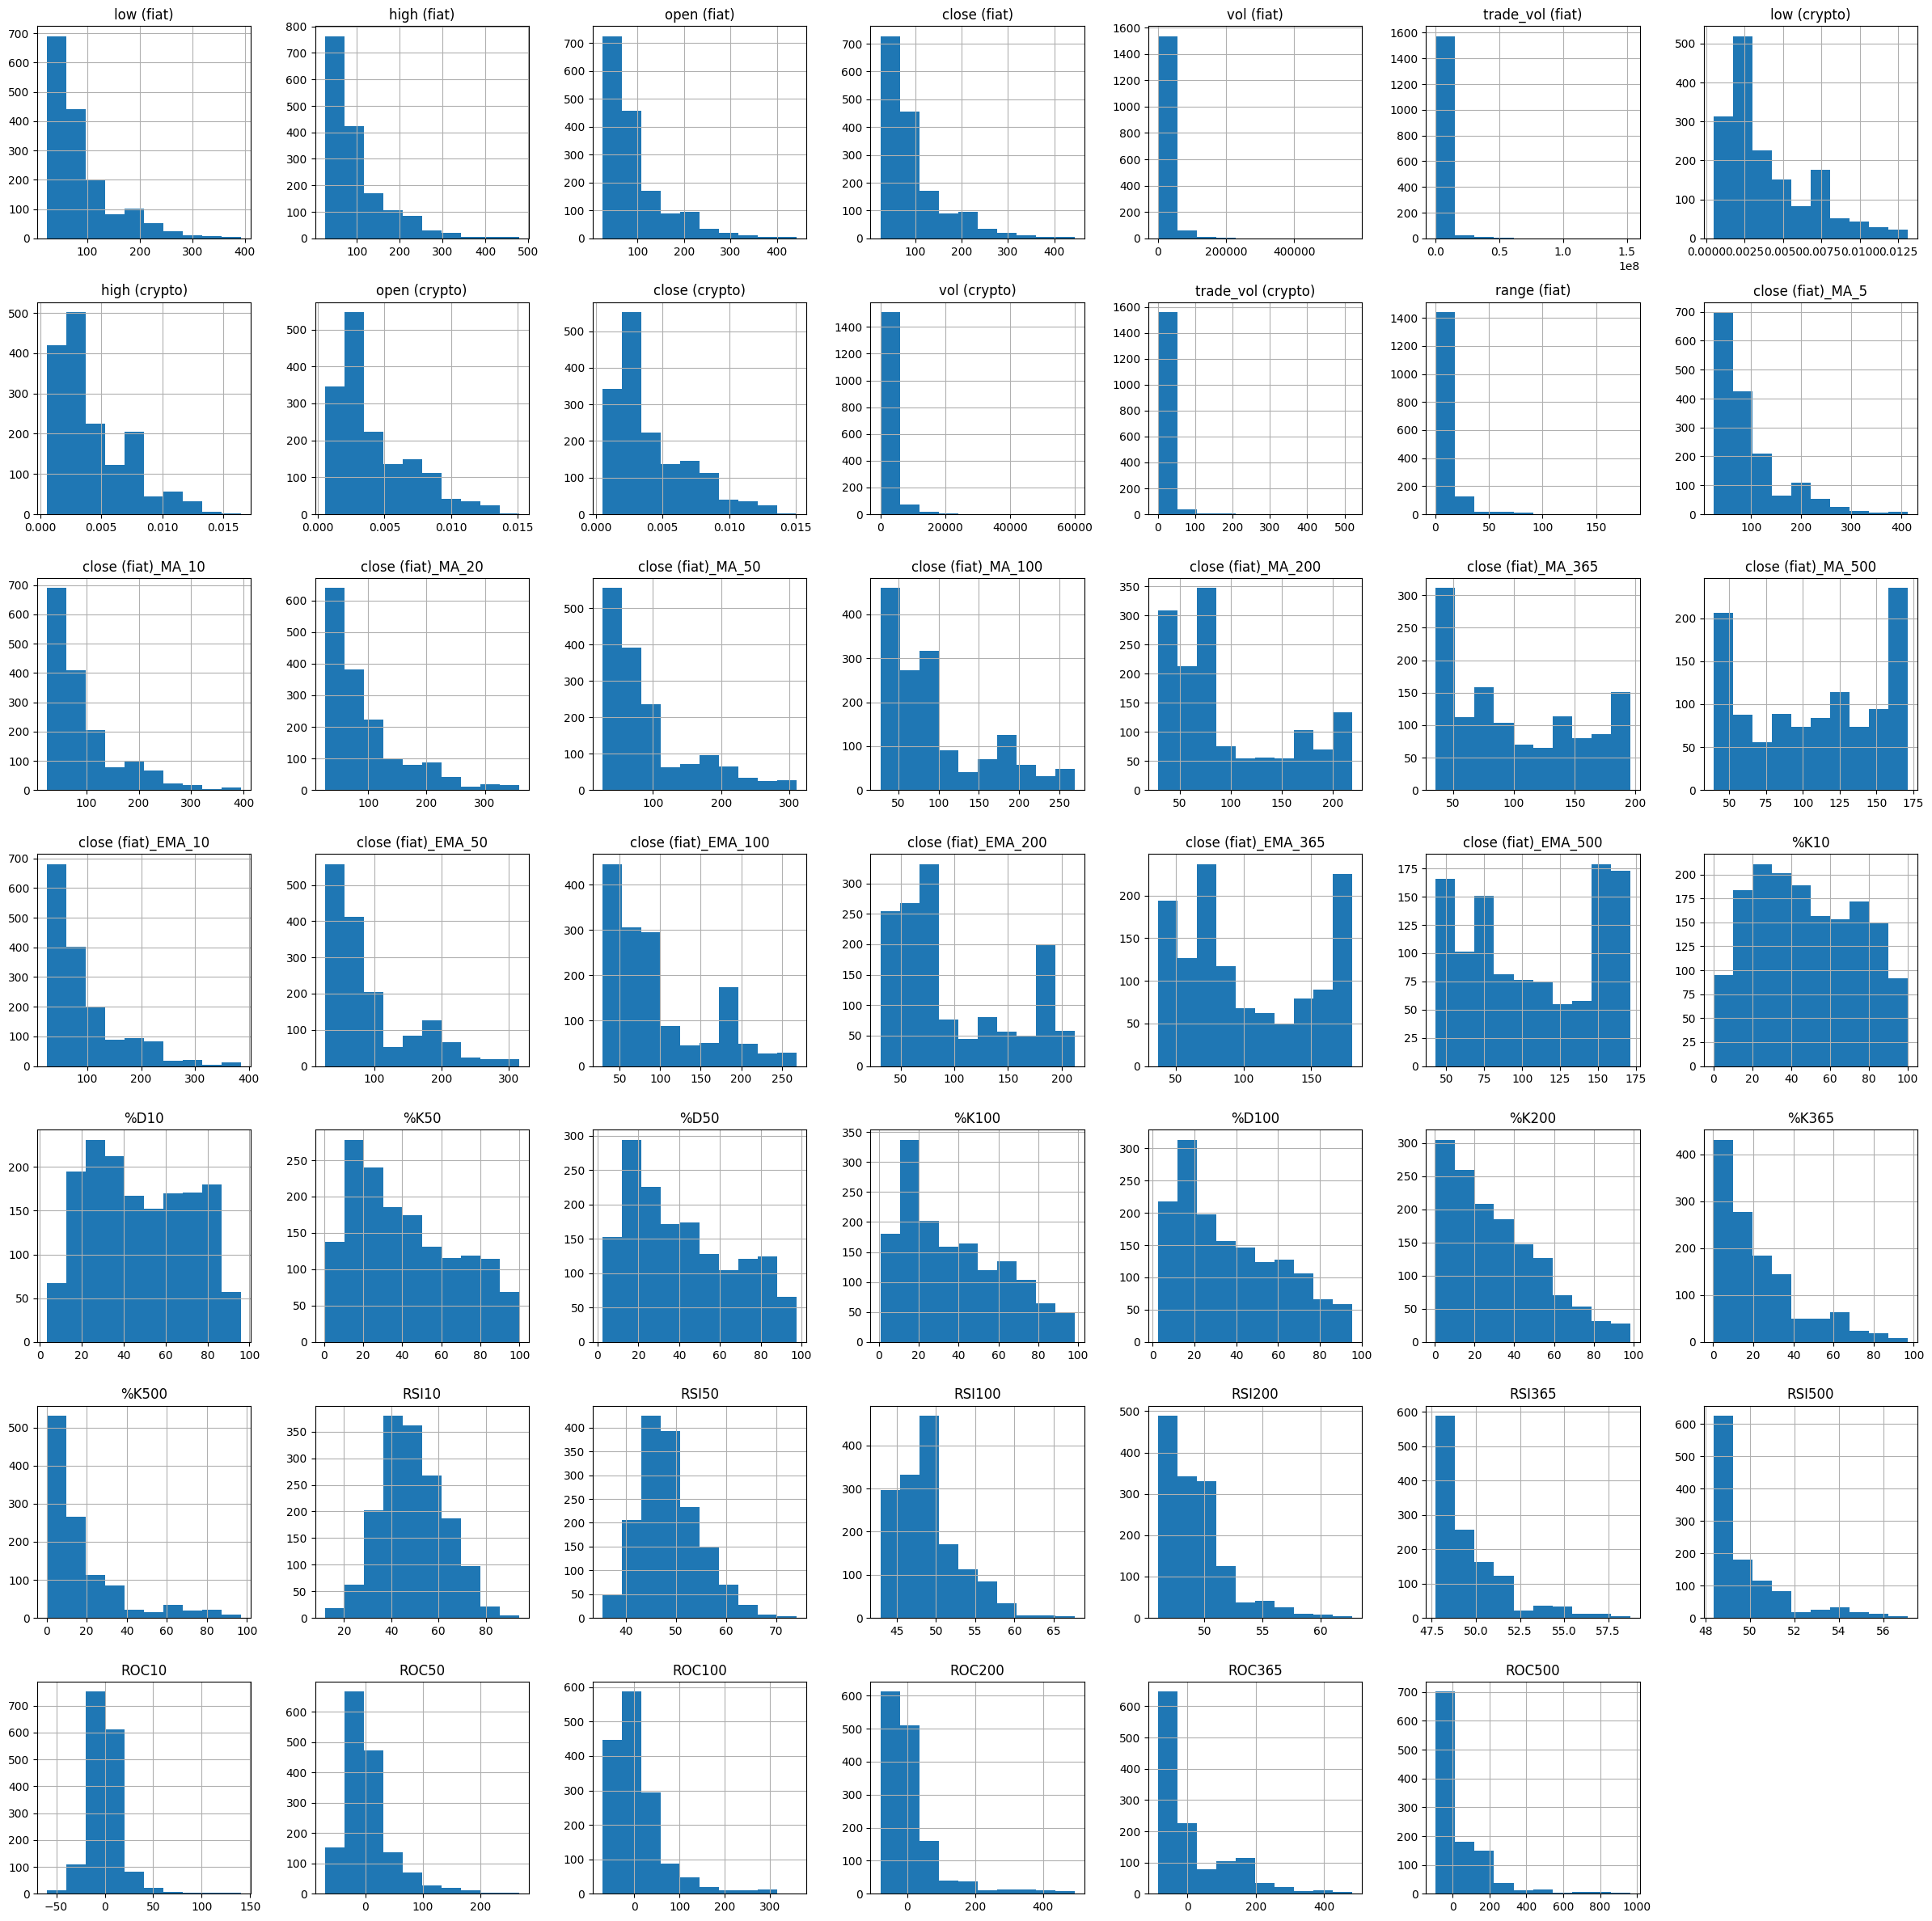

In [29]:
# plot histograms
df.hist(figsize=(30,30))
plt.show()

<Axes: title={'center': 'Correlation Matrix'}>

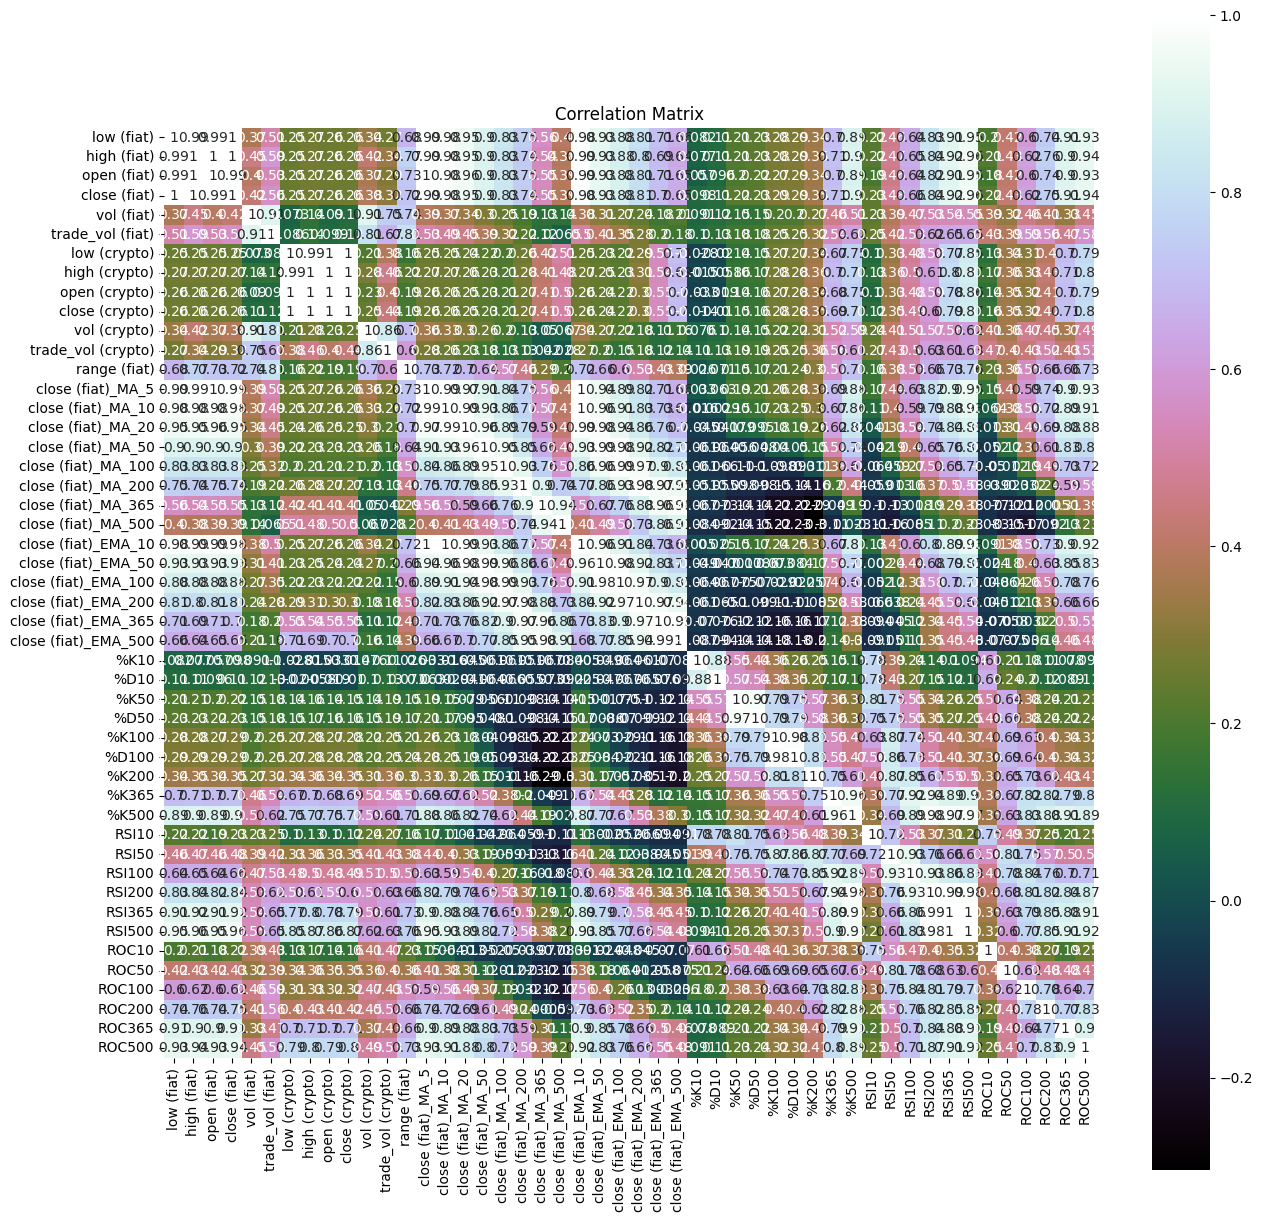

In [30]:
# correlation
correlation = df.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

In [31]:
# scatter plot matrix
# scatter_matrix(df, figsize=(30,30))
# plt.show()

# 5. Model Development

## 5.1. Data Preparation

In [32]:
# Define feature and target variables
features = df[['low (fiat)', 'high (fiat)', 'open (fiat)', 'close (fiat)', 'range (fiat)', 'close (fiat)_MA_10', 'close (fiat)_MA_50', 'close (fiat)_MA_100', 'close (fiat)_EMA_10', 'close (fiat)_EMA_50', 'close (fiat)_EMA_100', 'RSI100', 'RSI200', 'ROC100', 'ROC200']]
target_1 = df[['low (fiat)']]
target_2 = df[['high (fiat)']]
print(features.shape, target_1.shape, target_2.shape)

(1613, 15) (1613, 1) (1613, 1)


In [33]:
# replace NaN values with 0
features.fillna(0, inplace=True)

<ipython-input-33-3b137d39bb0d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.fillna(0, inplace=True)


In [34]:
features.head()

,low (fiat),high (fiat),open (fiat),close (fiat),range (fiat),close (fiat)_MA_10,close (fiat)_MA_50,close (fiat)_MA_100,close (fiat)_EMA_10,close (fiat)_EMA_50,close (fiat)_EMA_100,RSI100,RSI200,ROC100,ROC200
obs,,,,,,,,,,,,,,,
1,69.103,72.883,71.188,70.718,3.780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,69.012,70.998,70.691,70.969,1.986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,68.006,71.232,71.109,69.297,3.226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,68.002,70.573,69.328,69.864,2.571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,68.341,70.350,69.846,70.214,2.009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
target_1.head()

,low (fiat)
obs,
1,69.103
2,69.012
3,68.006
4,68.002
5,68.341


In [36]:
target_2.head()

,high (fiat)
obs,
1,72.883
2,70.998
3,71.232
4,70.573
5,70.350


### Normalization

In [37]:
# Normalize the data
# use different scalers for features and target variables to avoid data leakage during training and testing
X_scaler = MinMaxScaler()
Y1_scaler = MinMaxScaler()
Y2_scaler = MinMaxScaler()
features = X_scaler.fit_transform(features)
target_1 = Y1_scaler.fit_transform(target_1)
target_2 = Y2_scaler.fit_transform(target_2)

In [38]:
features

array([[0.12436571, 0.10542458, 0.11107818, ..., 0.        , 0.16326847,
        0.13751849],
       [0.1241197 , 0.10126828, 0.10989014, ..., 0.        , 0.16326847,
        0.13751849],
       [0.12140005, 0.10178423, 0.11088933, ..., 0.        , 0.16326847,
        0.13751849],
       ...,
       [0.02216809, 0.01733079, 0.01718714, ..., 0.7742136 , 0.17372707,
        0.13681219],
       [0.01489588, 0.01755129, 0.01761742, ..., 0.77123765, 0.19037595,
        0.13384409],
       [0.02111376, 0.01933728, 0.01560946, ..., 0.77440666, 0.18639116,
        0.13861636]])

In [39]:
target_1

array([[0.12436571],
       [0.1241197 ],
       [0.12140005],
       ...,
       [0.02216809],
       [0.01489588],
       [0.02111376]])

In [40]:
target_2

array([[0.10542458],
       [0.10126828],
       [0.10178423],
       ...,
       [0.01733079],
       [0.01755129],
       [0.01933728]])

### Formating data for LSTM

LSTMs expect input data in a 3D array of shape **[samples, time steps, features]**:
- **Sample**: number of samples
- **Time Step**: One time step is one observation in the tensor.
- **Feature**: One feature is one observation at a time step.

The shape of the output data should be **[samples, time steps]**.

In [41]:
# Define the number of time steps
past_time_steps = 100 # Number of past time steps to use as input
future_time_steps = 10 # Number of future time steps to predict

# Reshape the data to 3D array in the form [samples, time steps, features]
# the LSTM will take in 100 time steps of data to predict the next 10 time steps
def create_dataset(features, target, past_time_steps, future_time_steps):
    X, Y = [], []
    for i in range(len(features) - past_time_steps - future_time_steps + 1):
        X.append(features[i:(i + past_time_steps)])
        Y.append(target[i + past_time_steps:i + past_time_steps + future_time_steps])
    return np.array(X), np.array(Y)

X, Y_1 = create_dataset(features, target_1, past_time_steps, future_time_steps)
X, Y_2 = create_dataset(features, target_2, past_time_steps, future_time_steps)
print(X.shape, Y_1.shape, Y_2.shape)


(1504, 100, 15) (1504, 10, 1) (1504, 10, 1)


## 5.2. Train-test split

In [42]:
# Split the data into training, validation, and test sets
X_train, X_test, Y_1_train, Y_1_test = train_test_split(X, Y_1, test_size=0.2, random_state=0)
X_train, X_val, Y_1_train, Y_1_val = train_test_split(X_train, Y_1_train, test_size=0.2, random_state=0)

X_train, X_test, Y_2_train, Y_2_test = train_test_split(X, Y_2, test_size=0.2, random_state=0)
X_train, X_val, Y_2_train, Y_2_val = train_test_split(X_train, Y_2_train, test_size=0.2, random_state=0)

print(X_train.shape, X_val.shape, X_test.shape)
print(Y_1_train.shape, Y_1_val.shape, Y_1_test.shape)
print(Y_2_train.shape, Y_2_val.shape, Y_2_test.shape)

(962, 100, 15) (241, 100, 15) (301, 100, 15)
(962, 10, 1) (241, 10, 1) (301, 10, 1)
(962, 10, 1) (241, 10, 1) (301, 10, 1)


## 5.3. Model selection and training

In [43]:
# LSTM model using TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional, TimeDistributed, Conv1D, Flatten, RepeatVector, BatchNormalization, MaxPooling1D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import Adam

In [44]:
# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

### 5.3.1 Training the model for target_1

In [45]:
input_shape = (X_train.shape[1], X_train.shape[2])

# Define the convolutional LSTM model
model_1 = Sequential()

model_1.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
model_1.add(MaxPooling1D(pool_size=2))
model_1.add(Flatten())
model_1.add(RepeatVector(future_time_steps))
model_1.add(LSTM(100, activation='relu', return_sequences=True))
model_1.add(TimeDistributed(Dense(1)))
model_1.compile(optimizer='adam', loss='mse')

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 98, 64)            2944      
                                                                 
 max_pooling1d (MaxPooling1  (None, 49, 64)            0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 repeat_vector (RepeatVecto  (None, 10, 3136)          0         
 r)                                                              
                                                                 
 lstm (LSTM)                 (None, 10, 100)           1294800   
                                                                 
 time_distributed (TimeDist  (None, 10, 1)             1

In [46]:
# Train the model with early stopping for target 1
history_1 = model_1.fit(X_train, Y_1_train, epochs=20, batch_size=32, validation_data=(X_val, Y_1_val), callbacks=[early_stopping])

Epoch 1/20
31/31 [==============================] - 6s 31ms/step - loss: 0.1883 - val_loss: 0.0121
Epoch 2/20
31/31 [==============================] - 1s 18ms/step - loss: 0.0085 - val_loss: 0.0071
Epoch 3/20
31/31 [==============================] - 1s 20ms/step - loss: 0.0050 - val_loss: 0.0058
Epoch 4/20
31/31 [==============================] - 1s 20ms/step - loss: 0.0039 - val_loss: 0.0044
Epoch 5/20
31/31 [==============================] - 1s 32ms/step - loss: 0.0030 - val_loss: 0.0041
Epoch 6/20
31/31 [==============================] - 1s 43ms/step - loss: 0.0029 - val_loss: 0.0033
Epoch 7/20
31/31 [==============================] - 2s 62ms/step - loss: 0.0024 - val_loss: 0.0030
Epoch 8/20
31/31 [==============================] - 2s 49ms/step - loss: 0.0020 - val_loss: 0.0029
Epoch 9/20
31/31 [==============================] - 1s 47ms/step - loss: 0.0018 - val_loss: 0.0024
Epoch 10/20
31/31 [==============================] - 1s 48ms/step - loss: 0.0017 - val_loss: 0.0023
Epoch 11/

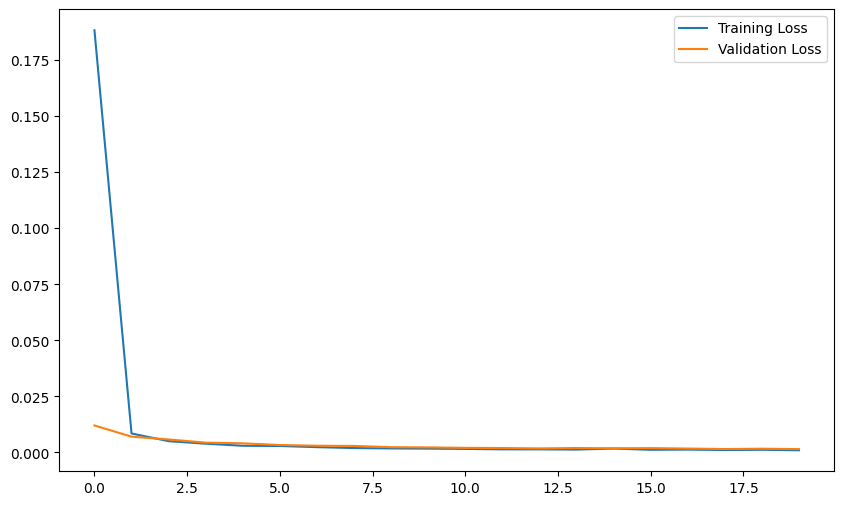

In [47]:
# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history_1.history['loss'], label='Training Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [48]:
# Evaluate the model
train_loss_1 = model_1.evaluate(X_train, Y_1_train, verbose=0)
val_loss_1 = model_1.evaluate(X_val, Y_1_val, verbose=0)
print('Train Loss:', train_loss_1)
print('Validation Loss:', val_loss_1)

Train Loss: 0.0009399792179465294
Validation Loss: 0.0015155771980062127


10/10 [==============================] - 0s 8ms/step


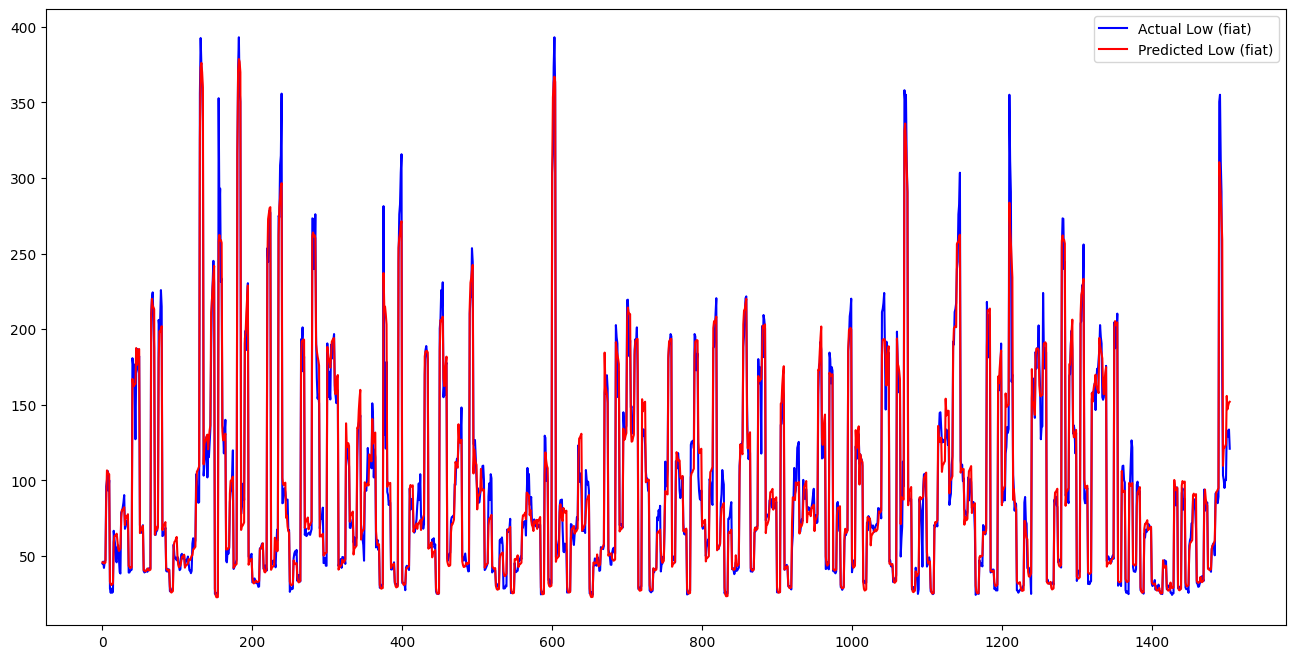

In [49]:
# Plot the predicted values against the actual values for low (fiat) and high (fiat)
Y_pred_1 = model_1.predict(X_test)
Y_pred_1 = Y1_scaler.inverse_transform(Y_pred_1.reshape(-1, 2))
Y_test_1 = Y1_scaler.inverse_transform(Y_1_test.reshape(-1, 2))

plt.figure(figsize=(16, 8))
plt.plot(Y_test_1[:, 0], label='Actual Low (fiat)', color='blue')
plt.plot(Y_pred_1[:, 0], label='Predicted Low (fiat)', color='red')
plt.legend()
plt.show()

In [50]:
# save model_1
model_1.save('model_1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### 5.3.2 Training the model for target_2

In [51]:
input_shape = (X_train.shape[1], X_train.shape[2])

# Define the convolutional LSTM model
model_2 = Sequential()

model_2.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
model_2.add(MaxPooling1D(pool_size=2))
model_2.add(Flatten())
model_2.add(RepeatVector(future_time_steps))
model_2.add(LSTM(100, activation='relu', return_sequences=True))
model_2.add(TimeDistributed(Dense(1)))
model_2.compile(optimizer='adam', loss='mse')

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 98, 64)            2944      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 49, 64)            0         
 g1D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 repeat_vector_1 (RepeatVec  (None, 10, 3136)          0         
 tor)                                                            
                                                                 
 lstm_1 (LSTM)               (None, 10, 100)           1294800   
                                                                 
 time_distributed_1 (TimeDi  (None, 10, 1)            

In [52]:
# Train the model with early stopping for target 2
history_2 = model_2.fit(X_train, Y_2_train, epochs=20, batch_size=32, validation_data=(X_val, Y_2_val), callbacks=[early_stopping])

Epoch 1/20
31/31 [==============================] - 3s 38ms/step - loss: 0.0757 - val_loss: 0.0167
Epoch 2/20
31/31 [==============================] - 1s 36ms/step - loss: 0.0105 - val_loss: 0.0059
Epoch 3/20
31/31 [==============================] - 1s 25ms/step - loss: 0.0048 - val_loss: 0.0042
Epoch 4/20
31/31 [==============================] - 1s 18ms/step - loss: 0.0033 - val_loss: 0.0038
Epoch 5/20
31/31 [==============================] - 1s 19ms/step - loss: 0.0024 - val_loss: 0.0025
Epoch 6/20
31/31 [==============================] - 1s 18ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 7/20
31/31 [==============================] - 1s 18ms/step - loss: 0.0019 - val_loss: 0.0021
Epoch 8/20
31/31 [==============================] - 1s 20ms/step - loss: 0.0016 - val_loss: 0.0017
Epoch 9/20
31/31 [==============================] - 1s 20ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 10/20
31/31 [==============================] - 1s 19ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 11/

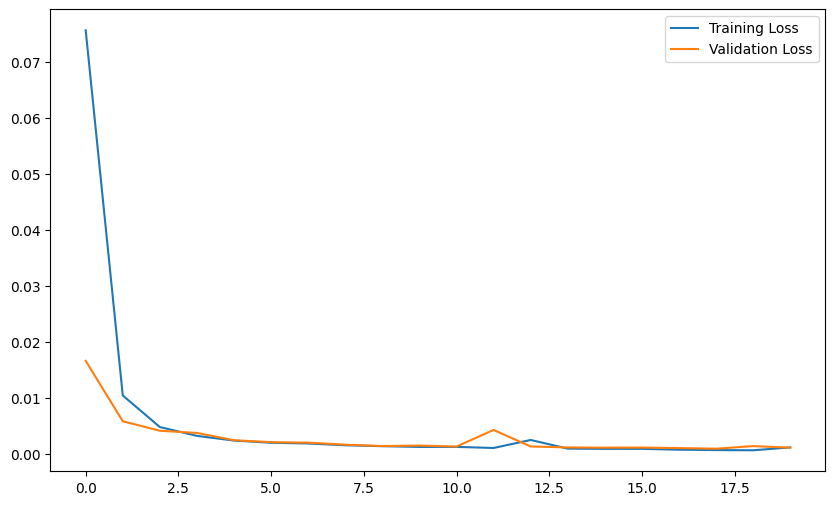

In [53]:
# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history_2.history['loss'], label='Training Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [54]:
# Evaluate the model
train_loss_2 = model_2.evaluate(X_train, Y_2_train, verbose=0)
val_loss_2 = model_2.evaluate(X_val, Y_2_val, verbose=0)
print('Train Loss:', train_loss_2)
print('Validation Loss:', val_loss_2)

Train Loss: 0.0008084508590400219
Validation Loss: 0.0011668226215988398


10/10 [==============================] - 0s 4ms/step


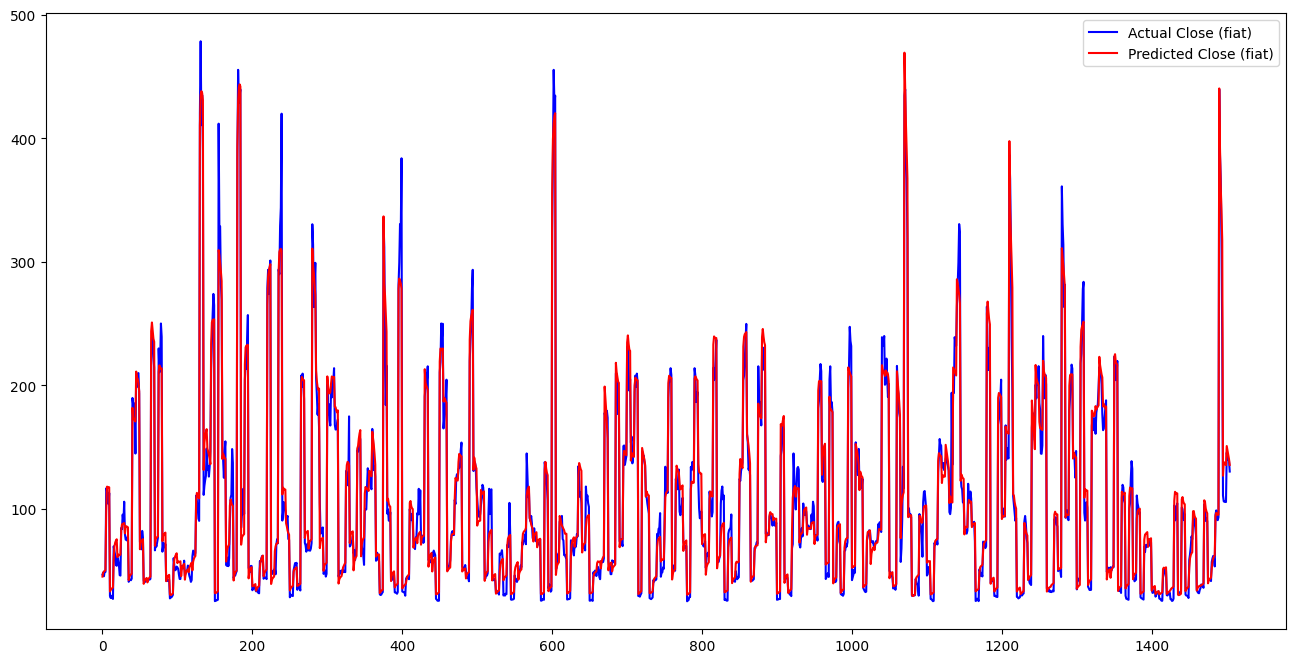

In [55]:
# Plot the predicted values against the actual values for high (fiat) and close (fiat)
Y_pred_2 = model_2.predict(X_test)
Y_pred_2 = Y2_scaler.inverse_transform(Y_pred_2.reshape(-1, 2))
Y_test_2 = Y2_scaler.inverse_transform(Y_2_test.reshape(-1, 2))

plt.figure(figsize=(16, 8))
plt.plot(Y_test_2[:, 0], label='Actual Close (fiat)', color='blue')
plt.plot(Y_pred_2[:, 0], label='Predicted Close (fiat)', color='red')
plt.legend()
plt.show()

In [56]:
# save model_2
model_2.save('model_2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# 6. Model Scoring & Prediction
Forecast the daily high/low price of Crypto A traded in Fiat Currency,
FIAT A. Generate the resulting data in a dataset named “CryptoA_10Day.csv” with three
columns in it. The three column names have to be “obs”, “high_fiat”, “low_fiat”.

## 6.1. Evaluate model performance:
- Use appropriate metrics like Mean Absolute Error (MAE) or Mean Squared Error (MSE) to assess the accuracy of predictions on the test data.
- Compare performance across different models and choose the best performing model.

In [57]:
from sklearn.metrics import mean_absolute_error

# Calculate the mean absolute error
mae_low = mean_absolute_error(Y_test_1[:, 0], Y_pred_1[:, 0])
mae_high = mean_absolute_error(Y_test_2[:, 1], Y_pred_2[:, 1])
print('Mean Absolute Error for Low (fiat):', mae_low)
print('Mean Absolute Error for High (fiat):', mae_high)

Mean Absolute Error for Low (fiat): 7.68725905735358
Mean Absolute Error for High (fiat): 9.155024590101275


## 6.2. Generate predictions:
Use the chosen model to predict the daily high and low prices for the next 10 days.

In [58]:
# Make predictions for the next 10 days using the last 100 days of data
X_input = features[-past_time_steps:].reshape(1, past_time_steps, features.shape[1])
Y_output_1 = model_1.predict(X_input)
Y_output_1 = Y1_scaler.inverse_transform(Y_output_1. reshape(-1, 1))
print(Y_output_1)

Y_output_2 = model_2.predict(X_input)
Y_output_2 = Y2_scaler.inverse_transform(Y_output_2. reshape(-1, 1))
print(Y_output_2)

1/1 [==============================] - 0s 95ms/step
[[30.088696]
 [28.352346]
 [27.083275]
 [26.654318]
 [26.683033]
 [26.901487]
 [27.175112]
 [27.44466 ]
 [27.687376]
 [27.896921]]
1/1 [==============================] - 0s 19ms/step
[[31.246326]
 [30.90256 ]
 [30.61131 ]
 [30.581573]
 [30.698803]
 [30.88004 ]
 [31.080196]
 [31.27607 ]
 [31.45646 ]
 [31.616785]]


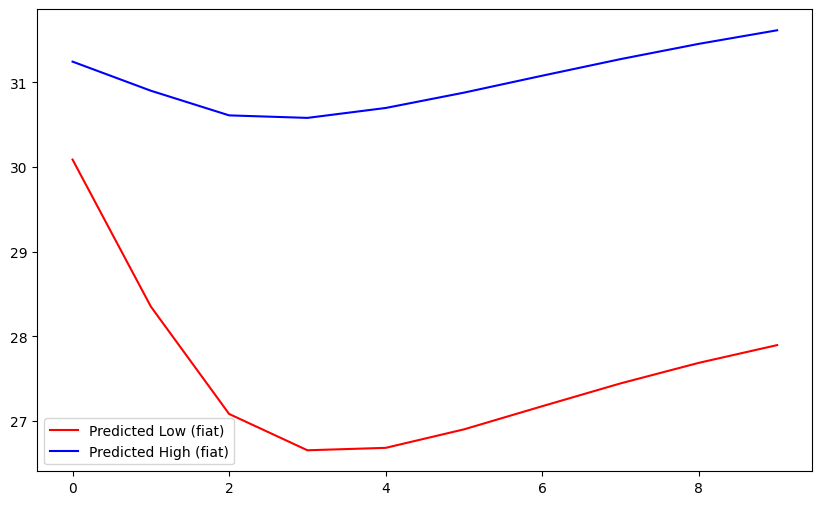

In [59]:
# Plot the predicted values for the next 10 days for low (fiat) and high (fiat) tpgether with the previous 100
plt.figure(figsize=(10, 6))
plt.plot(Y_output_1, label='Predicted Low (fiat)', color='red')
plt.plot(Y_output_2, label='Predicted High (fiat)', color='blue')
plt.legend()
plt.show()

## 6.3. Create Submission:
- Create a DataFrame named "CryptoA_10Day.csv" with columns "obs", "high_fiat", and "low_fiat".
- Create a DataFrame names "High_Low.csv" with only values of the highest and the lowest daily predicted prices

In [61]:
# Create a DataFrame with the predicted values for the next 10 days
# index: 1614 - 1623
CryptoA_10Day = pd.DataFrame({'high_fiat': Y_output_2.ravel(),'low_fiat': Y_output_1.ravel()}, index=range(1614, 1624))
# change index name to obs
CryptoA_10Day.index.name = 'obs'
# flip the low_fiat and high_fiat columns so that the low_fiat is the first column and high_fiat is the second column
CryptoA_10Day.to_csv('CryptoA_10Day.csv')
CryptoA_10Day

,high_fiat,low_fiat
obs,,
1614,31.246326,30.088696
1615,30.902559,28.352346
1616,30.611309,27.083275
1617,30.581573,26.654318
1618,30.698803,26.683033
1619,30.880039,26.901487
1620,31.080196,27.175112
1621,31.276070,27.444660
1622,31.456461,27.687376


In [62]:
# the highest and lowest values of the predicted high (fiat) and low (fiat) for the next 10 days
highest = CryptoA_10Day['high_fiat'].max()
lowest = CryptoA_10Day['low_fiat'].min()
print('Highest Predicted High (fiat) for the next 10 days:', highest)
print('Lowest Predicted Low (fiat) for the next 10 days:', lowest)

# Create a DataFrame with just the highest and lowest values
High_Low = pd.DataFrame({'high_fiat': [highest], 'low_fiat': [lowest]})
High_Low.to_csv('High_Low.csv', index=False)
High_Low

Highest Predicted High (fiat) for the next 10 days: 31.616785
Lowest Predicted Low (fiat) for the next 10 days: 26.654318


,high_fiat,low_fiat
0,31.616785,26.654318
